In [24]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
import xgboost as xgb
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fao3864/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [76]:
t=[]
#t +=[pd.read_csv('stacking/xgb_3.csv')]
t += [pd.read_csv('stacking/xgb_4.csv')]
t += [pd.read_csv('stacking/xgb_5.csv')]
t += [pd.read_csv('stacking/xgb_6.csv')]
t += [pd.read_csv('stacking/xgb_7.csv')]
t += [pd.read_csv('stacking/xgb_8.csv')]
t += [pd.read_csv('stacking/xgb_9.csv')]
t += [pd.read_csv('stacking/rf_10.csv')]
t += [pd.read_csv('stacking/ext_11.csv')]
t += [pd.read_csv('stacking/lgb_12.csv')]
t += [pd.read_csv('stacking/lgb_13.csv')]
t += [pd.read_csv('stacking/lgb_14.csv')]
t += [pd.read_csv('stacking/nn_15.csv')]
#t += [pd.read_csv('stacking/nn_16.csv')]

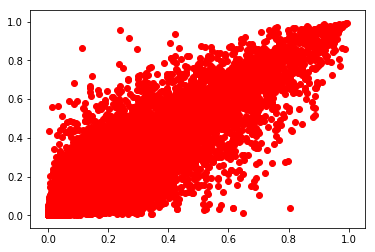

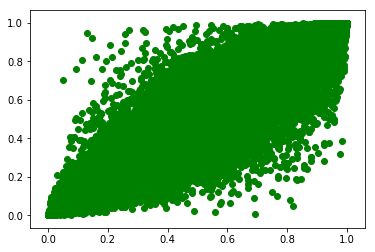

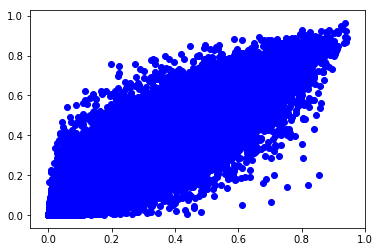

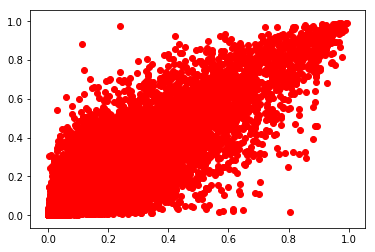

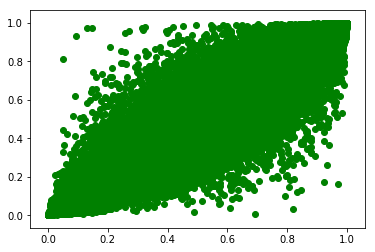

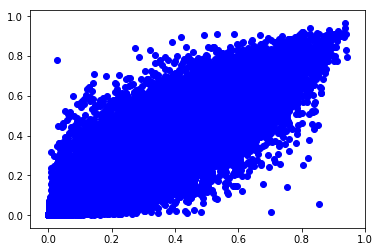

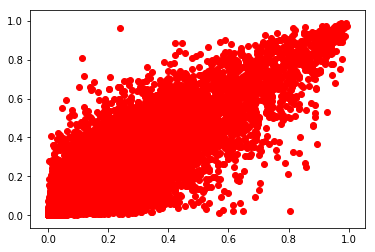

KeyboardInterrupt: 

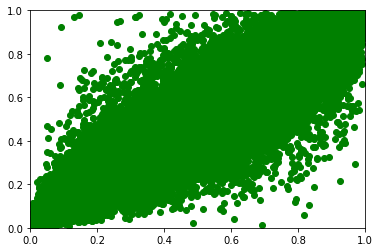

In [77]:
for i in range(0, 12):
    for j in range(i+1, 14):
        pylab.scatter(t[i]['high'], t[j]['high'], color='red')
        plt.show()
        pylab.scatter(t[i]['low'], t[j]['low'], color='g')
        plt.show()
        pylab.scatter(t[i]['medium'], t[j]['medium'], color='b')
        plt.show()


In [78]:
cols = ['high', 'low', 'medium']
Meta_data = t[0].ix[:, cols]
for i in range(1, 12):
    Meta_data = pd.concat([ Meta_data, t[i].ix[:, cols] ], axis=1)
Meta_data

,high,low,medium,high,low,medium,high,low,medium,high,...,medium,high,low,medium,high,low,medium,high,low,medium
0,0.016098,0.849852,0.134050,0.008704,0.893734,0.097562,0.007664,0.922327,0.070009,0.014136,...,0.088200,0.011060,0.884235,0.104705,0.014083,0.885020,0.100897,0.030019,0.730351,0.239630
1,0.001206,0.981281,0.017513,0.000155,0.994067,0.005778,0.000332,0.994956,0.004713,0.000483,...,0.006198,0.000699,0.992898,0.006403,0.000693,0.994113,0.005194,0.000340,0.988363,0.011297
2,0.069211,0.507324,0.423465,0.101171,0.465834,0.432995,0.115964,0.516179,0.367857,0.096621,...,0.483942,0.104961,0.476762,0.418277,0.093318,0.412987,0.493694,0.330445,0.321079,0.348477
3,0.009472,0.906606,0.083922,0.008459,0.885832,0.105710,0.004357,0.877018,0.118626,0.005749,...,0.080558,0.010634,0.871066,0.118300,0.004712,0.906565,0.088723,0.006081,0.933730,0.060189
4,0.001194,0.947674,0.051132,0.001110,0.991913,0.006977,0.002182,0.978992,0.018826,0.001914,...,0.004090,0.003055,0.987507,0.009438,0.002122,0.989832,0.008047,0.000452,0.991844,0.007704
5,0.007783,0.822364,0.169853,0.001745,0.855066,0.143189,0.001474,0.886972,0.111554,0.002208,...,0.088450,0.003167,0.876389,0.120445,0.002778,0.923197,0.074024,0.001206,0.962012,0.036782
6,0.002117,0.956003,0.041879,0.000535,0.979929,0.019536,0.000579,0.971144,0.028277,0.001290,...,0.043743,0.002009,0.956722,0.041269,0.001455,0.969219,0.029326,0.000094,0.997014,0.002892
7,0.001230,0.931405,0.067365,0.001343,0.945687,0.052970,0.001598,0.944442,0.053960,0.003467,...,0.040854,0.007650,0.918031,0.074319,0.005255,0.935486,0.059259,0.000860,0.931796,0.067344
8,0.043684,0.324077,0.632239,0.057698,0.256333,0.685969,0.110089,0.303353,0.586559,0.126486,...,0.540238,0.130012,0.319542,0.550445,0.107229,0.212897,0.679874,0.190055,0.398124,0.411821
9,0.020971,0.863857,0.115171,0.045233,0.669000,0.285767,0.090645,0.530232,0.379122,0.109449,...,0.395405,0.071576,0.520517,0.407907,0.048923,0.596631,0.354446,0.122425,0.510851,0.366724


In [79]:
X_train = pd.read_json("train.json")
X_test = pd.read_json("test.json")
le = preprocessing.LabelEncoder()
X_train['interest_level'] = le.fit_transform(X_train['interest_level']) 
y_train = pd.DataFrame(X_train['interest_level'])
y_train.index = range(len(y_train))
listing_id = pd.DataFrame(X_train.listing_id)
listing_id.index = range(len(listing_id))
listing_id_test = pd.DataFrame(X_test.listing_id)
listing_id_test.index = range(len(listing_id_test))

In [80]:
param = {}
param['objective'] = 'multi:softprob'
param['eval_metric'] = 'mlogloss'
param['max_depth'] = 4
# param['booster'] = 'dart'
#param['booster'] = 'gblinear'
param['eta'] = 0.03
param['subsample'] = 0.7
# param["scale_pos_weight"] = 0.5
param['colsample_bytree'] = 0.7
param['nthread'] = 8
param['num_class'] = 3
#param['alpha'] = 0.00
#param['lambda_bias'] = 0.1
# param['lambda'] = 0
param['min_child_weight'] = 1

# if param['booster'] == 'gblinear': param['eta'] *= 1e-4
numround = 360



#LGBM
params = {
    #'task': 'train',
    #'boosting_type': 'gbdt',
    #'objective': 'regression',
    #'metric': {'l2', 'auc'},
    #'num_leaves': 31,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.8,
    #'bagging_freq': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'objective': 'multiclass',
    'nthread': -1,
    'learning_rate': 0.03,
    'min_child_weight': 100,
    #'max_depth': 6
    #'num_class': 3
    
}





skf = StratifiedKFold(5, shuffle=True, random_state=0)
pred_train = np.zeros((len(y_train), 3))
xgbs = []
sc,sc_mean = [],[]

for itr, ite in skf.split(Meta_data, y_train.interest_level.values):
    ypred = []
    for i in range(1):
               
        param['seed'] = i+1
        
        #xgboost
        Xdatatrain = xgb.DMatrix(data=Meta_data.ix[itr, :].values,
                                     label=y_train.ix[itr].values)
        Xdataval = xgb.DMatrix(data=Meta_data.ix[ite, :].values,
                                     label=y_train.ix[ite].values)

        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdataval, 'eval')]
        bst = xgb.train(plst, Xdatatrain, numround, evals=watchlist, verbose_eval=20)

        pred_train[ite] = bst.predict(Xdataval)
        ypred = bst.predict(Xdataval)
        
        #rc = ensemble.ExtraTreesClassifier(n_estimators=1300, criterion='gini', max_depth=None, n_jobs=-1)
        #rc.fit(Meta_data.ix[itr, :], y_train.ix[itr])
        #ypred = rc.predict_proba(Meta_data.ix[ite, :])
        '''
        lgb = lgbm.sklearn.LGBMClassifier(n_estimators=500, seed=0, **params)
        lgb.fit(Meta_data.ix[itr, :], y_train.ix[itr])
        ypred = lgb.predict_proba(Meta_data.ix[ite, :])
        '''
        xgbs.append(bst)
        
    #ypred = sum(ypred) / len(ypred)
    pred_train[ite] = ypred
    
    sc.append(log_loss(y_train.ix[ite, :], ypred))
#     break 0.523298 0.5192 0.517532 0.515532 0.505869

print('XGB: {:.5f} +- {:.3f}'.format(np.mean(sc), np.std(sc)))    

[0]	train-mlogloss:1.07437	eval-mlogloss:1.07467
[20]	train-mlogloss:0.768393	eval-mlogloss:0.772047
[40]	train-mlogloss:0.632874	eval-mlogloss:0.639207
[60]	train-mlogloss:0.566565	eval-mlogloss:0.575009
[80]	train-mlogloss:0.532351	eval-mlogloss:0.542988
[100]	train-mlogloss:0.513829	eval-mlogloss:0.526517
[120]	train-mlogloss:0.503144	eval-mlogloss:0.517821
[140]	train-mlogloss:0.496612	eval-mlogloss:0.51311
[160]	train-mlogloss:0.49222	eval-mlogloss:0.510479
[180]	train-mlogloss:0.488957	eval-mlogloss:0.509078
[200]	train-mlogloss:0.486189	eval-mlogloss:0.50826
[220]	train-mlogloss:0.483897	eval-mlogloss:0.507816
[240]	train-mlogloss:0.481635	eval-mlogloss:0.507613
[260]	train-mlogloss:0.479549	eval-mlogloss:0.507519
[280]	train-mlogloss:0.477683	eval-mlogloss:0.507504
[300]	train-mlogloss:0.475789	eval-mlogloss:0.507465
[320]	train-mlogloss:0.473971	eval-mlogloss:0.507452
[340]	train-mlogloss:0.472332	eval-mlogloss:0.507454
[0]	train-mlogloss:1.07433	eval-mlogloss:1.07451
[20]	tra

In [ ]:
0.50576
0.50679
0.505
0.510
0.511

In [81]:
t=[]
#t +=[pd.read_csv('stacking/xgb_3_test.csv')]
t += [pd.read_csv('stacking/xgb_4_test.csv')]
t += [pd.read_csv('stacking/xgb_5_test.csv')]
t += [pd.read_csv('stacking/xgb_6_test.csv')]
t += [pd.read_csv('stacking/xgb_7_test.csv')]
t += [pd.read_csv('stacking/xgb_8_test.csv')]
t += [pd.read_csv('stacking/xgb_9_test.csv')]
t += [pd.read_csv('stacking/rf_10_test.csv')]
t += [pd.read_csv('stacking/ext_11_test.csv')]
t += [pd.read_csv('stacking/lgb_12_test.csv')]
t += [pd.read_csv('stacking/lgb_13_test.csv')]
t += [pd.read_csv('stacking/lgb_14_test.csv')]
t += [pd.read_csv('stacking/nn_15_test.csv')]
#t += [pd.read_csv('stacking/nn_16_test.csv')]
cols = ['high', 'low', 'medium']
Meta_test = t[0].ix[:, cols]
for i in range(1, 12):
    Meta_test = pd.concat([ Meta_test, t[i].ix[:, cols] ], axis=1)
Meta_test

,high,low,medium,high,low,medium,high,low,medium,high,...,medium,high,low,medium,high,low,medium,high,low,medium
0,0.140541,0.244142,0.615316,0.207265,0.128927,0.663808,0.199657,0.116974,0.683369,0.214170,...,0.768275,0.176423,0.143047,0.680530,0.149805,0.107973,0.742222,0.099200,0.326265,0.574534
1,0.097370,0.768974,0.133656,0.021534,0.952903,0.025562,0.005702,0.977726,0.016572,0.005449,...,0.023711,0.019987,0.955215,0.024798,0.021248,0.945951,0.032801,0.000414,0.992990,0.006596
2,0.001647,0.889932,0.108421,0.008192,0.780856,0.210952,0.008499,0.765896,0.225605,0.007025,...,0.227151,0.006829,0.805219,0.187952,0.012685,0.812086,0.175229,0.025505,0.712396,0.262100
3,0.251864,0.269193,0.478943,0.207704,0.367562,0.424733,0.275592,0.184766,0.539641,0.276168,...,0.588211,0.266771,0.221971,0.511258,0.218207,0.144405,0.637388,0.366202,0.114624,0.519174
4,0.045809,0.688864,0.265327,0.037223,0.631397,0.331380,0.039581,0.681394,0.279025,0.041225,...,0.302367,0.058068,0.683490,0.258442,0.036380,0.661148,0.302471,0.044029,0.668982,0.286989
5,0.002159,0.951412,0.046428,0.001458,0.943031,0.055511,0.001945,0.958095,0.039960,0.002012,...,0.054205,0.001934,0.951220,0.046847,0.001107,0.971046,0.027847,0.000369,0.971304,0.028327
6,0.033175,0.702650,0.264175,0.017106,0.735113,0.247781,0.015409,0.761977,0.222614,0.014304,...,0.208286,0.015990,0.745890,0.238121,0.015830,0.765830,0.218340,0.012680,0.601656,0.385665
7,0.038796,0.382532,0.578672,0.057769,0.416338,0.525893,0.090353,0.284925,0.624721,0.086180,...,0.475655,0.077023,0.379036,0.543941,0.067271,0.421649,0.511079,0.067697,0.484869,0.447434
8,0.045475,0.596146,0.358379,0.029586,0.642764,0.327649,0.026794,0.610002,0.363204,0.025358,...,0.315577,0.019838,0.629824,0.350338,0.026659,0.562277,0.411064,0.021906,0.778492,0.199602
9,0.024356,0.570587,0.405057,0.039621,0.498868,0.461510,0.049857,0.535177,0.414966,0.042528,...,0.568232,0.027100,0.579031,0.393869,0.036289,0.471480,0.492231,0.094838,0.535600,0.369561


In [82]:
Xdatatrain = xgb.DMatrix(data=Meta_data.values,
                                     label=y_train.values)
Xdatatest = xgb.DMatrix(data=Meta_test.values)
plst = list(param.items())
numround = 350
bst = xgb.train(plst, Xdatatrain, numround,  verbose_eval=20)
test_pred = bst.predict(Xdatatest)

In [181]:
rc = ensemble.ExtraTreesClassifier(n_estimators=1300, criterion='gini', max_depth=None, n_jobs=-1)
rc.fit(Meta_data, y_train)
test_pred = rc.predict_proba(Meta_test)

/home/fao3864/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [36]:
        lgb = lgbm.sklearn.LGBMClassifier(n_estimators=500, seed=0, **params)
        lgb.fit(Meta_data, y_train)
        test_pred = lgb.predict_proba(Meta_test)

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
test_pred

array([[ 0.19154078,  0.14467621,  0.66378307],
       [ 0.00866898,  0.94481778,  0.04651326],
       [ 0.00961   ,  0.79964125,  0.19074871],
       ..., 
       [ 0.05764839,  0.54542392,  0.39692765],
       [ 0.30087516,  0.08935001,  0.60977483],
       [ 0.006444  ,  0.89515525,  0.09840077]], dtype=float32)

In [84]:
test_pred = pd.DataFrame(test_pred, columns=["high", "low", "medium"])
test_pred = pd.concat([listing_id_test, test_pred], axis=1, join_axes=[listing_id_test.index])

In [85]:
test_pred

,listing_id,high,low,medium
0,7142618,0.191541,0.144676,0.663783
1,7210040,0.008669,0.944818,0.046513
2,7103890,0.009610,0.799641,0.190749
3,7143442,0.263799,0.159041,0.577160
4,6860601,0.027304,0.650870,0.321826
5,6840081,0.001190,0.954863,0.043948
6,6922337,0.013565,0.721877,0.264558
7,6913616,0.098853,0.389683,0.511464
8,6937820,0.026652,0.609632,0.363716
9,6893933,0.041461,0.540859,0.417680


In [183]:
test_pred = pd.read_csv('st_4.csv') * 0.7 + test_pred *0.3

In [86]:
test_pred.to_csv("st_6.csv", index=None)

In [41]:
t=[]
t +=[pd.read_csv('st_2.csv')]
t += [pd.read_csv('st_3.csv')]
t += [pd.read_csv('st_4.csv')]

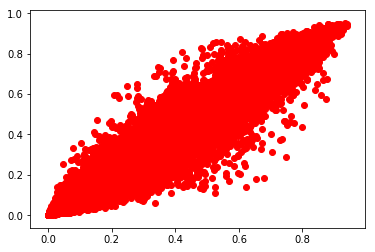

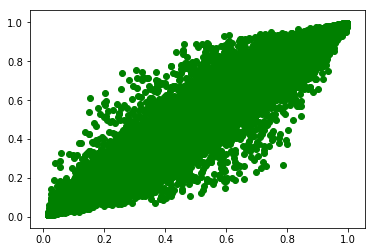

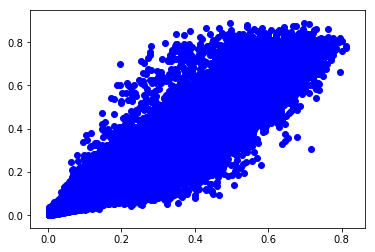

In [45]:
        pylab.scatter(t[0]['high'], t[2]['high'], color='red')
        plt.show()
        pylab.scatter(t[0]['low'], t[2]['low'], color='g')
        plt.show()
        pylab.scatter(t[0]['medium'], t[2]['medium'], color='b')
        plt.show()

In [49]:
tmp = (t[0] + t[2]) / 2.0
tmp.listing_id = tmp.listing_id.astype(int)
tmp.to_csv("3lev_1.csv", index=None)